Name: 

**Part 1**

 Write two functions named "camera_matrix" and "camera_projection". The first one gets all the camera parameters, containing λ, f (focal length), Sx, Sy, Sθ, Ox, Oy, R, T, and returns the camera matrix (Please provide comments above each stage of transformation). The second function projects a given 3D point on image and returns a 2D point in pixel coordinates.

In [187]:
import numpy as np
def camer_matrix(landa, f, Sx, Sy, S_theta, Ox, Oy, R, T):

    # implement your function here

    # K is the calibration matrix
    K = np.array([[f*Sx, f*S_theta, Ox], [0, f*Sy, Oy], [0, 0, 1]])

    # pi_0_matrix
    pi_0 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])

    # g matrix is [[R, T], [0, 1]]
    g = np.hstack((R, T.T))
    g = np.vstack((g, np.array([[0, 0, 0, 1]])))

    #computing camera matrix
    matrix = (1/landa) * K @ pi_0 @ g

    return matrix

def camera_projection(X, Y, Z, matrix):

    # implement your function here

    # X, Y, Z are the coordinates of the point in the world frame
    # matrix is the camera matrix
    # x, y are the coordinates of the point in the image frame
    projection = matrix @ np.array([[X], [Y], [Z], [1]])
    projection = projection.flatten()
    # normalize to get x , y in 2d space
    x = projection[0] / projection[2]
    y = projection[1] / projection[2]
    return x, y


**Part 2**

Consider a pinhole camera with center located at (1, 1, -3), which its focal length is 100, scale factors (Sx, Sy) are both 1 and pixel coordinates of principal point is (50, 50). Also skew parameter is zero. The angle of the camera is such that the optical axis of the camera is parallel to the z axis. Using the previous function obtain the whole camera matrix.

In [188]:
T = -np.array([[1, 1, -3]])
R = np.eye(3)
landa = 1
matrix = camer_matrix(landa, 100, 1, 1, 0, 50, 50, R, T)
print(matrix)

[[100.   0.  50.  50.]
 [  0. 100.  50.  50.]
 [  0.   0.   1.   3.]]


**Part 3**

Suppose that vector V: (0, 1, 1) is located at (1, 1, 3) in 3D space. Apply the obtained camera matrix to V. Plot the result in pixel coordinates in a 2D plot. From which step of projection the length of the vector changes?

Answer: length of the vector changes after multiplying with the calibration matrix (K). This happens due to the scale factors that exist in the calibration matrix.

length of vector before projection is 1.4142135623730951
length of vector after projection is 14.285714285714292


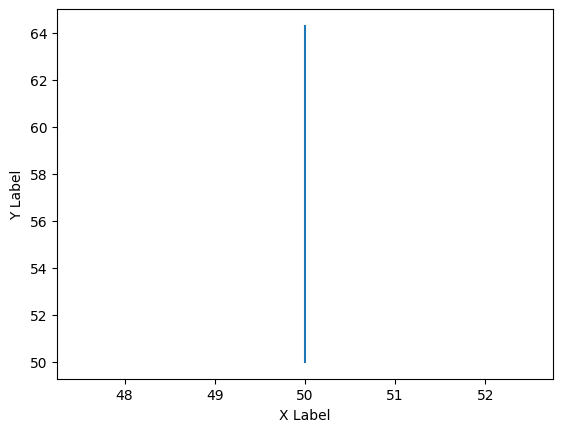

In [189]:
import matplotlib.pyplot as plt

def draw_proj(matrix):
    p1 = np.array([1, 1, 3])
    p2 = p1 + np.array([0, 1, 1])
    print(f'length of vector before projection is {np.linalg.norm(p2 - p1)}')
    p1_proj = camera_projection(p1[0], p1[1], p1[2], matrix)
    p2_proj = camera_projection(p2[0], p2[1], p2[2], matrix)
    print(f'length of vector after projection is {np.linalg.norm(np.array(p2_proj) - np.array(p1_proj))}')

    #plotting the results
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot([p1_proj[0],p2_proj[0]],[p1_proj[1],p2_proj[1]])
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    plt.show()

draw_proj(matrix)

**Part 4**

If the camera is rotated by +25 degrees around x axis, how would R and T change? What would the final image be?

length of vector before projection is 1.4142135623730951
length of vector after projection is 10.418428558535584


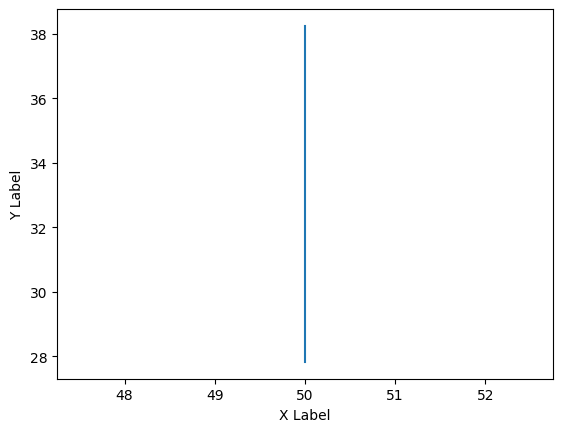

In [190]:
# T would not change
# R would change to below
T = -np.array([[1, 1, -3]])
teta = (25/180)* np.pi
R = np.array([[1, 0, 0],[0, np.cos(teta), -np.sin(teta)],[0, np.sin(teta), np.cos(teta)]])
matrix = camer_matrix(landa, 100, 1, 1, 0, 50, 50, R, T)
draw_proj(matrix)